In [25]:
# Imports
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions

In [26]:
# Configuration options
blobs_random_seed = 42
centers = [(0,0), (5,5)]
cluster_std = 1
frac_test_split = 0.33
num_features_for_samples = 2
num_samples_total = 1000

In [27]:
# Generate data
inputs, targets = make_blobs(n_samples = num_samples_total, centers = centers, n_features = num_features_for_samples, cluster_std = cluster_std)
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=frac_test_split, random_state=blobs_random_seed)

In [28]:
# Save and load temporarily
np.save('./data.npy', (X_train, X_test, y_train, y_test))
X_train, X_test, y_train, y_test = np.load('./data.npy', allow_pickle=True)

C:\Users\Souvik\AppData\Roaming\Python\Python39\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


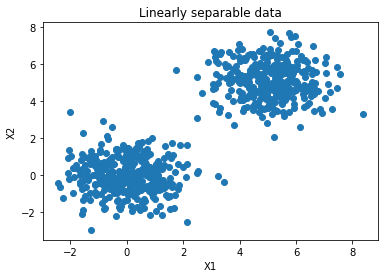

In [29]:
# Generate scatter plot for training data 
plt.scatter(X_train[:,0], X_train[:,1])
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [30]:
# Initialize SVM classifier
clf = svm.SVC(kernel='linear')

In [31]:
# Fit data
clf = clf.fit(X_train, y_train)

In [32]:
# Predict the test set
predictions = clf.predict(X_test)

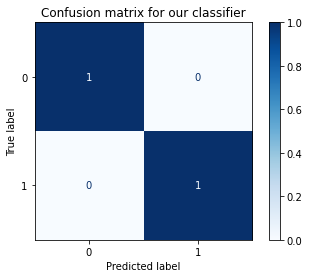

In [33]:
# Generate confusion matrix
matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, normalize='true')

plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

In [34]:
# Get support vectors
support_vectors = clf.support_vectors_

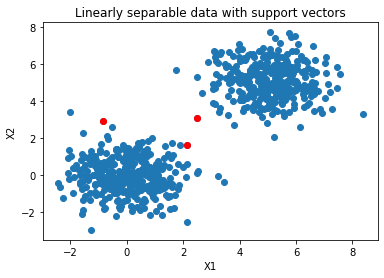

In [35]:
# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

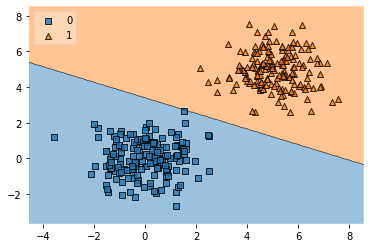

In [36]:
# Plot decision boundary
plot_decision_regions(X_test, y_test, clf=clf, legend=2)
plt.show()